### Jan 2025: END SEMESTER ASSESSMENT (ESA)
## M. TECH DATA SCIENCE AND MACHINE LEARNING_ SEMESTER II

### UE20CS935 : Introduction to Deep Learning and Applications

### Section C Q5

#### Section C: Question 5:    (20 Marks)

Develop a Semantic segmentation model using Unet architecture on the given dataset.

Dermatoscopic images usually depict a single skin lesion, but large scale datasets with available segmentations of affected areas are not available until now. Challenge segmentation data often suffered from being either too coarse or too noisy. This dataset provides images and binary segmentation masks in .bmp format .

Students can make use of pre-trained Unet segmentation model using the library

import segmentation_models as sm

Hints :
    1. Load all the images in one array of size 99x128x128x1 Where 99 is total number of trained images 128x128x3 is each image size
    
    2. Load all the masks in one array of size 99x128x128x1
    
    3. Scale both the above two arrays
    
    4. Split the data into train and test
    
    5. Define the pre-trained segmentation model. Use encoder_weight=None, If internet access is not available.
    
    6. Compile with appropriate loss and metric and fit the data into it.
    
    7. Reduce the batch_size to 1 or 2, if you get any memory related error
    
Run the model for minimum 2 epochs and present your result. The solution will be evaluated based on approach only as it take lot of epochs to produce good result.



In [3]:
import os
import cv2
from PIL import Image
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
#import segmentation_models as sm
from sklearn.model_selection import train_test_split
from PIL import Image
#from tensorflow.keras.utils import normalize

In [4]:
os.environ["SM_FRAMEWORK"] = "tf.keras"

In [5]:
# hint : uncomment  below to fetch path
image_dir='Unet_Dataset/images/'
mask_dir='Unet_Dataset/mask/'

In [6]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Function to load all images into a numpy array
def load_images_from_folder(folder, target_size):
    images = []
    for filename in sorted(os.listdir(folder)):  # Sorting ensures correct pairing
        img_path = os.path.join(folder, filename)
        img = load_img(img_path, target_size=target_size)
        img_array = img_to_array(img)
        images.append(img_array)
    return np.array(images)

In [7]:
# Parameters
IMG_HEIGHT = 128
IMG_WIDTH = 128
IMG_CHANNELS = 3

# Step 1: Load all the images
images = load_images_from_folder(image_dir, target_size=(IMG_HEIGHT, IMG_WIDTH))
masks = load_images_from_folder(mask_dir, target_size=(IMG_HEIGHT, IMG_WIDTH))
masks = np.expand_dims(masks[..., 0], axis=-1)  # Keep masks binary (128x128x1)

print(f"Number of images:{len(images)}")
print(f"Number of images:{len(masks)}")

Number of images:99
Number of images:99


In [8]:
# convert the image data to array format and normalize/scale using (tensorflow.keras.utils.normalize()) function or (image data/255.)
images = images / 255.0  # Scale images to range [0, 1]
masks = masks / 255.0    # Scale masks to range [0, 1]

In [9]:
# split the data into train test with following specifications
#Hint: train_test_split(img_dataset,mask_dataset,test_size=0.20,random_state=0)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, masks, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((79, 128, 128, 3), (20, 128, 128, 3))

In [10]:
#take the pre-trained model as resnet34 and do pre-processing
import segmentation_models as sm
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

Segmentation Models: using `tf.keras` framework.


In [11]:
# use the preprocessed train input for model fitting


In [12]:
#load the Unet model using the below syntax
#model= sm.Unet(BACKBONE, input_shape=(128,128,1),
#                                encoder_weights=None, classes=1, activation='sigmoid')
# Model compilation with the following specifications
#Hint: optimizer='Adam'
#    loss=sm.losses.bce_jaccard_loss
#    metrics=[sm.metrics.iou_score])

In [13]:
BACKBONE = 'resnet34'  # Using ResNet34 backbone
preprocess_input = sm.get_preprocessing(BACKBONE)

# Preprocess data
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

# Define model
model = sm.Unet(BACKBONE, encoder_weights='imagenet', input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), classes=1, activation='sigmoid')

# Compile the model
model.compile(optimizer='adam',
              loss=sm.losses.bce_jaccard_loss,  # Binary crossentropy + Jaccard loss
              #metrics=[sm.metrics.iou_score]
              metrics=['accuracy'])  # Accuracy

In [35]:
# fit the model for X_train_prepr and y_train.
# use batch_size=2 and epochs=5 (maximum)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=5,  # Run for at least 5 epochs
    batch_size=2
)

# Evaluate the model
results = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {results[0]}")
print(f"Test Accuracy: {results[1]}")


Epoch 1/5
40/40 [==============================] - 14s 340ms/step - loss: 0.1462 - accuracy: 0.9782 - val_loss: 0.3296 - val_accuracy: 0.9575
Epoch 2/5
40/40 [==============================] - 15s 373ms/step - loss: 0.1531 - accuracy: 0.9776 - val_loss: 0.3083 - val_accuracy: 0.9611
Epoch 3/5
40/40 [==============================] - 15s 365ms/step - loss: 0.1518 - accuracy: 0.9769 - val_loss: 0.2624 - val_accuracy: 0.9686
Epoch 4/5
40/40 [==============================] - 15s 377ms/step - loss: 0.1375 - accuracy: 0.9793 - val_loss: 0.2780 - val_accuracy: 0.9657
Epoch 5/5
1/1 [==============================] - 0s 382ms/step - loss: 0.2302 - accuracy: 0.9692
Test Loss: 0.2301895171403885
Test Accuracy: 0.9692474603652954


1/1 [==============================] - 0s 61ms/step


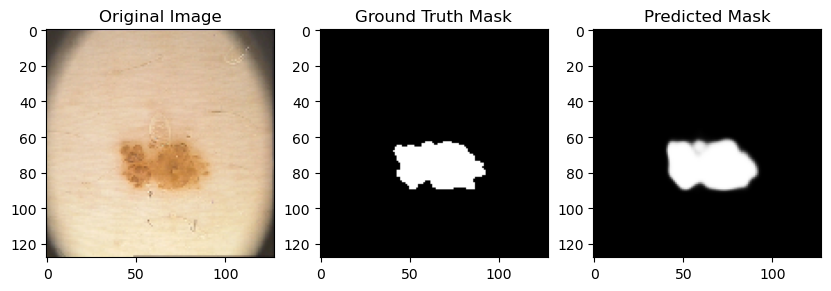

1/1 [==============================] - 0s 56ms/step


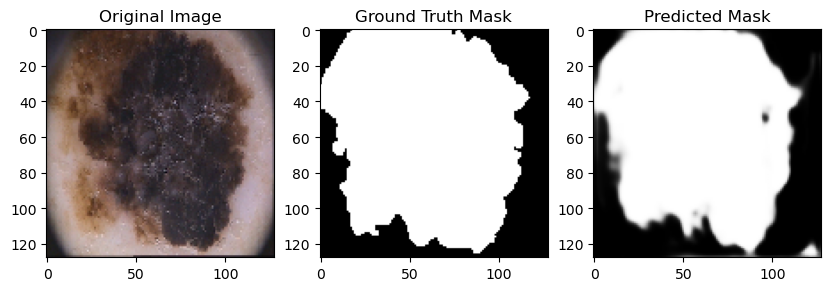

1/1 [==============================] - 0s 53ms/step


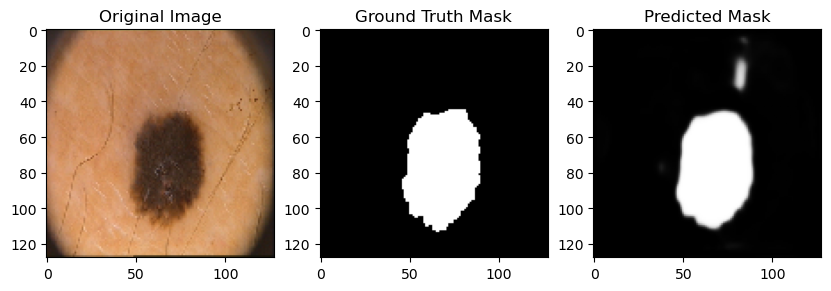

1/1 [==============================] - 0s 54ms/step


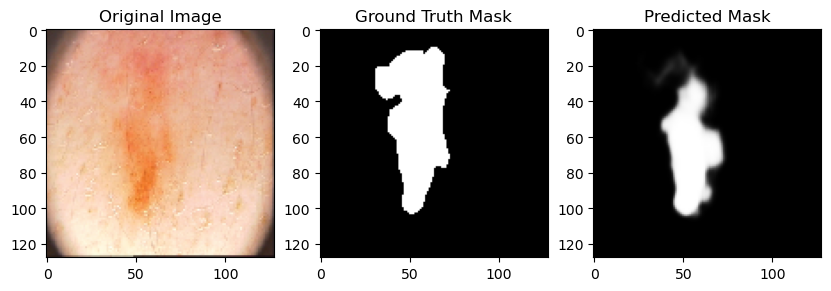

1/1 [==============================] - 0s 57ms/step


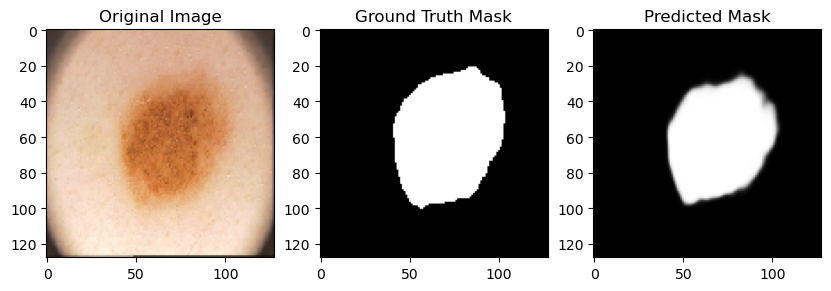

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure correct shape for visualization
X_test = X_test.squeeze()  # Removes the last dimension if it's (num_samples, 128, 128, 1)
y_test = y_test.squeeze()  # Removes the last dimension if it's (num_samples, 128, 128, 1)

# Display a few predictions
for i in range(5):
    plt.figure(figsize=(10, 5))
    
    # Original Image
    plt.subplot(1, 3, 1)
    plt.imshow(X_test[i], cmap='gray')  # Display the original image
    plt.title('Original Image')
    
    # Ground Truth Mask
    plt.subplot(1, 3, 2)
    plt.imshow(y_test[i], cmap='gray')  # Display the ground truth mask
    plt.title('Ground Truth Mask')
    
    # Model Prediction
    pred_mask = model.predict(np.expand_dims(X_test[i], axis=0)).squeeze()  # Predict and remove extra dimensions
    plt.subplot(1, 3, 3)
    plt.imshow(pred_mask, cmap='gray')  # Display the predicted mask
    plt.title('Predicted Mask')
    
    plt.show()